In [177]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
diabetes

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0        1354778            0            171                      80   
1        1147438            8             92                      93   
2        1640031            7            115                      47   
3        1883350            9            103                      78   
4        1424119            1             85                      59   
...          ...          ...            ...                     ...   
14995    1490300           10             65                      60   
14996    1744410            2             73                      66   
14997    1742742            0             93                      89   
14998    1099353            0            132                      98   
14999    1386396            3            114                      65   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                    34            23  43.509726          1.213191   21   
1                    47            36  21.240576          0.158365   23   
2                    52            35  41.511523          0.079019   23   
3                    25           304  29.582192          1.282870   43   
4                    27            35  42.604536          0.549542   22   
...                 ...           ...        ...               ...  ...   
14995                46           177  33.512468          0.148327   41   
14996                27           168  30.132636          0.862252   38   
14997                43            57  18.690683          0.427049   24   
14998                18           161  19.791645          0.302257   23   
14999                47           512  36.215437          0.147363   34   

       Diabetic  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
14995         1  
14996         1  
14997         0  
14998         0  
14999         1  

[15000 rows x 10 columns]

In [178]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0                0            171                      80                34   
1                8             92                      93                47   
2                7            115                      47                52   
3                9            103                      78                25   
4                1             85                      59                27   
...            ...            ...                     ...               ...   
14995           10             65                      60                46   
14996            2             73                      66                27   
14997            0             93                      89                43   
14998            0            132                      98                18   
14999            3            114                      65                47   

       SerumInsulin        BMI  DiabetesPedigree  Age  
0                23  43.509726          1.213191   21  
1                36  21.240576          0.158365   23  
2                35  41.511523          0.079019   23  
3               304  29.582192          1.282870   43  
4                35  42.604536          0.549542   22  
...             ...        ...               ...  ...  
14995           177  33.512468          0.148327   41  
14996           168  30.132636          0.862252   38  
14997            57  18.690683          0.427049   24  
14998           161  19.791645          0.302257   23  
14999           512  36.215437          0.147363   34  

[15000 rows x 8 columns]


y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [179]:
pd.Series(y).value_counts(normalize=True)

Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [180]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [181]:
X.describe()


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
count  15000.000000   15000.000000            15000.000000      15000.000000   
mean       3.224533     107.856867               71.220667         28.814000   
std        3.391020      31.981975               16.758716         14.555716   
min        0.000000      44.000000               24.000000          7.000000   
25%        0.000000      84.000000               58.000000         15.000000   
50%        2.000000     104.000000               72.000000         31.000000   
75%        6.000000     129.000000               85.000000         41.000000   
max       14.000000     192.000000              117.000000         93.000000   

       SerumInsulin           BMI  DiabetesPedigree           Age  
count  15000.000000  15000.000000      15000.000000  15000.000000  
mean     137.852133     31.509646          0.398968     30.137733  
std      133.068252      9.759000          0.377944     12.089703  
min       14.000000     18.200512          0.078044     21.000000  
25%       39.000000     21.259887          0.137743     22.000000  
50%       83.000000     31.767940          0.200297     24.000000  
75%      195.000000     39.259692          0.616285     35.000000  
max      799.000000     56.034628          2.301594     77.000000

Unique values 15
Unique values 149
Unique values 90
Unique values 69
Unique values 663
Unique values 15000
Unique values 14999
Unique values 56


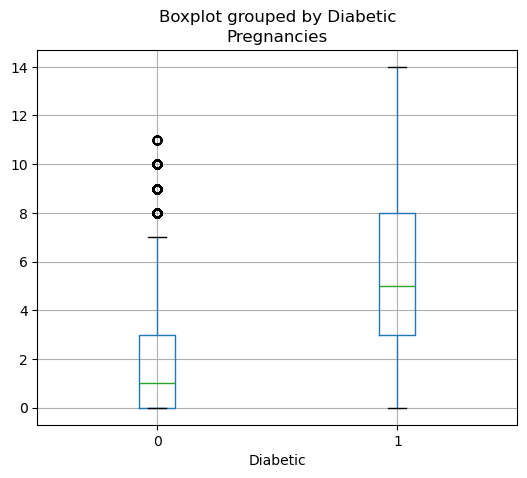

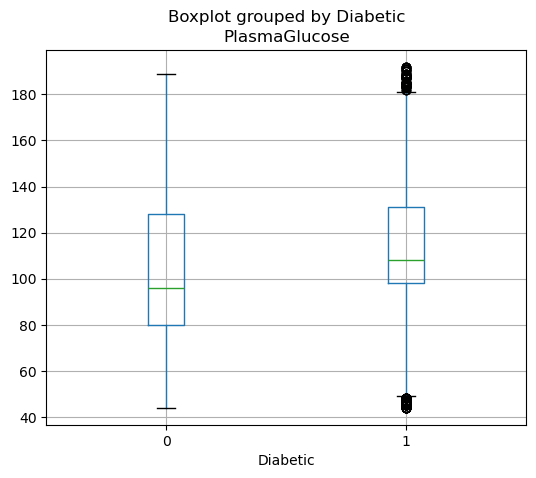

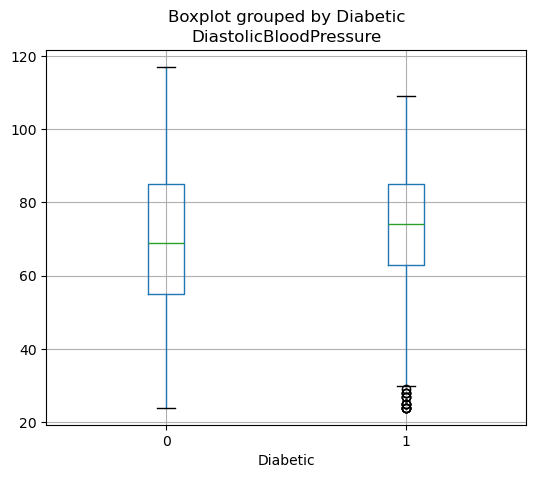

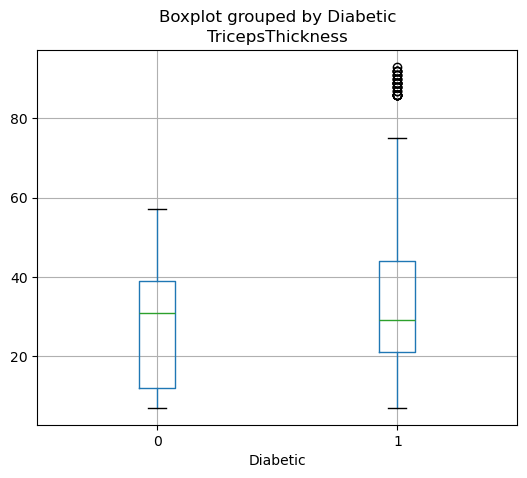

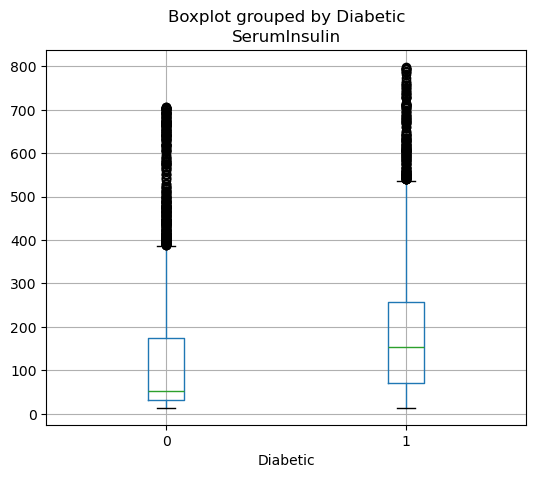

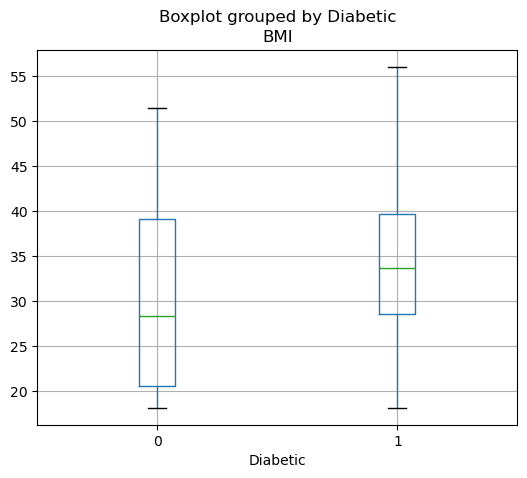

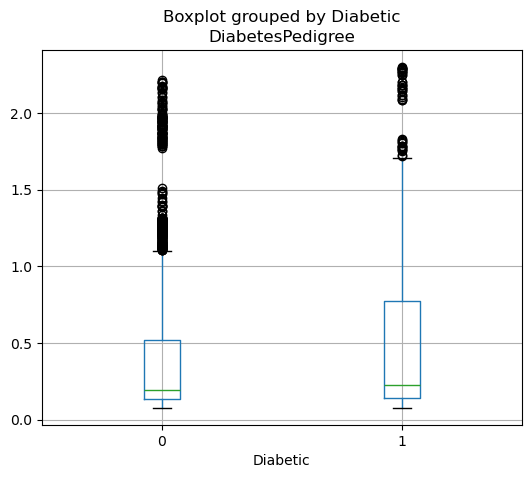

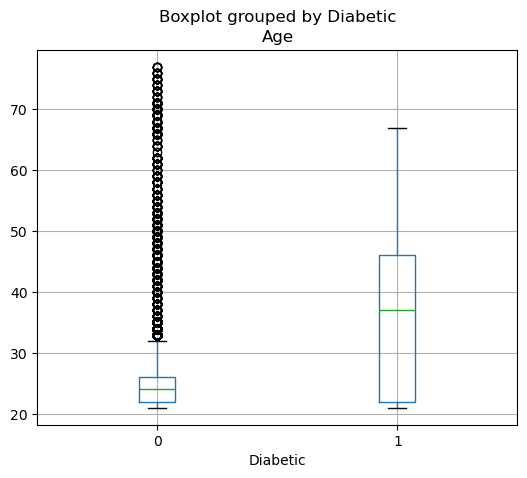

In [182]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,5))
    plt.title(col)
    plt.show

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

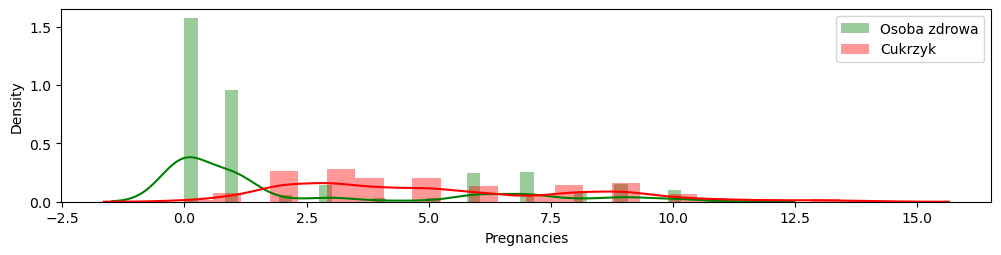

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

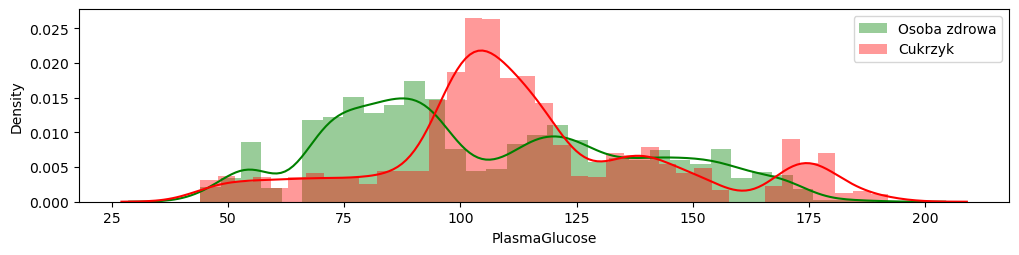

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

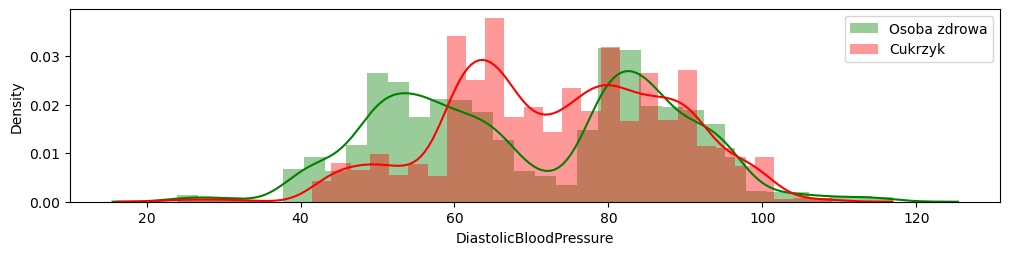

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

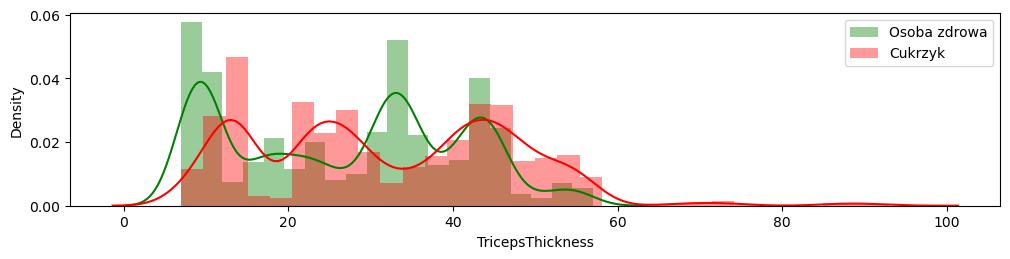

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

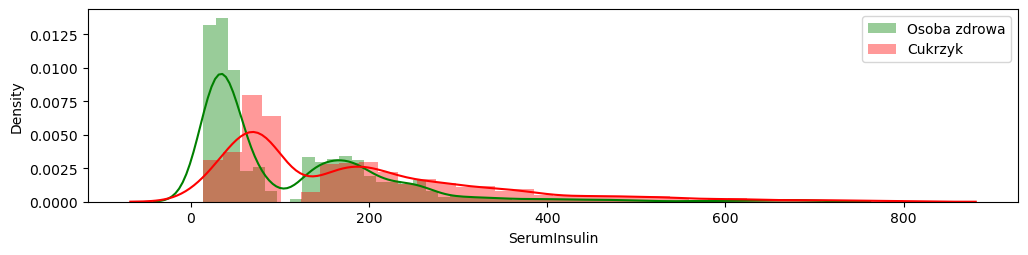

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

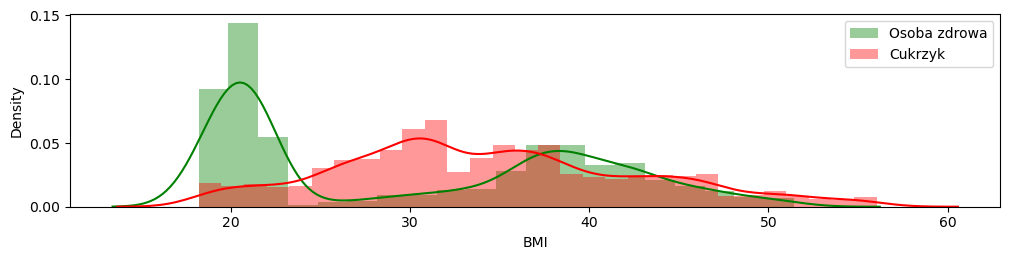

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

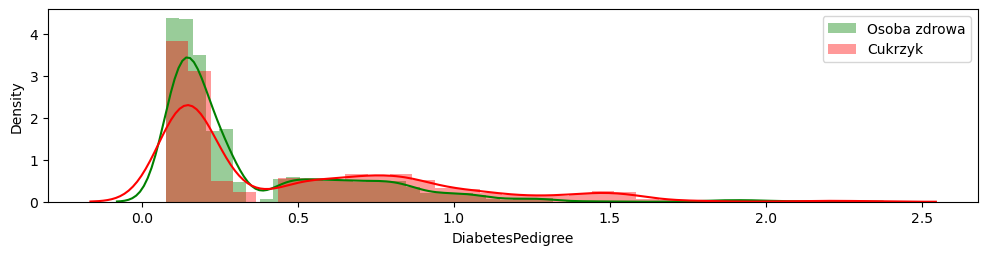

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\krzys\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3377817562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

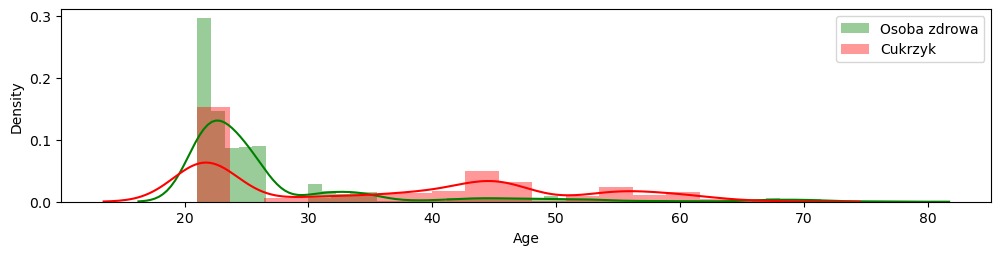

In [183]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
    sns.distplot(diabetes.loc[diabetes['Diabetic']==1, col], kde=True, color='red', label='Cukrzyk')
    plt.legend(loc='upper right')
    plt.show()

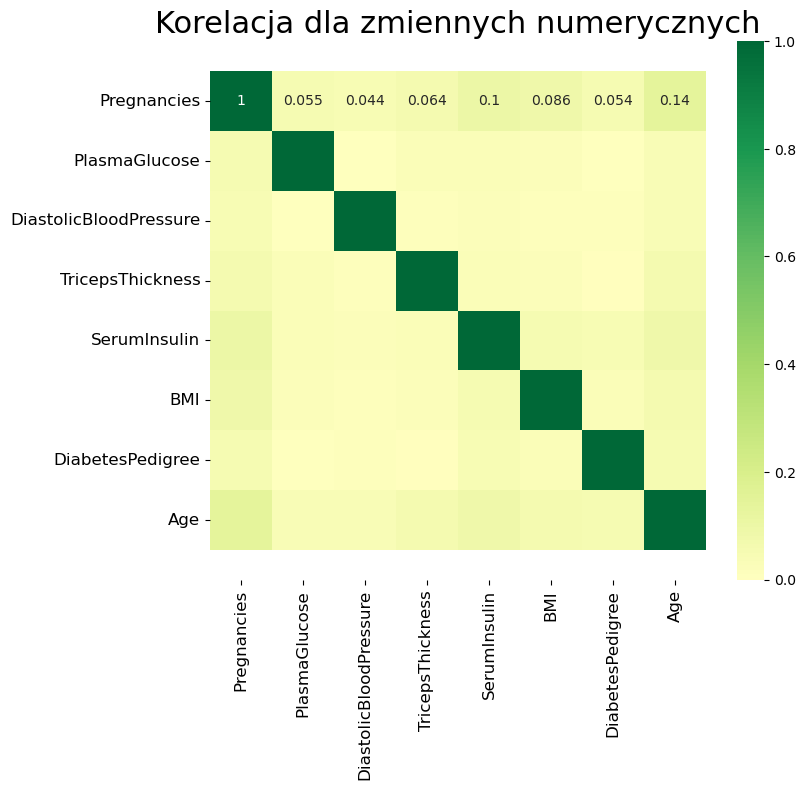

In [184]:
plt.figure(figsize=(8, 7))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [185]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


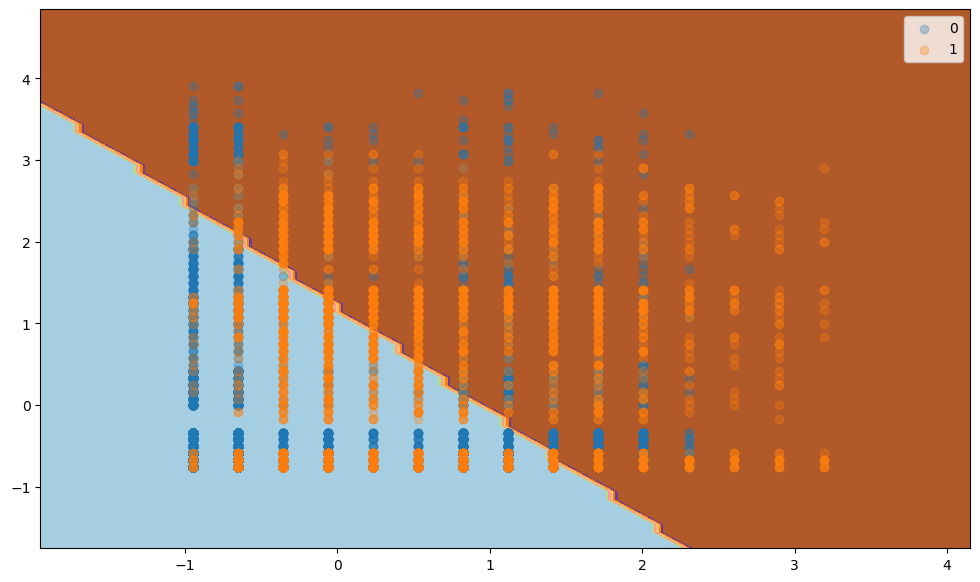

In [188]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [189]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:     [0 1 0 0 0] [1 1 0 0 0]


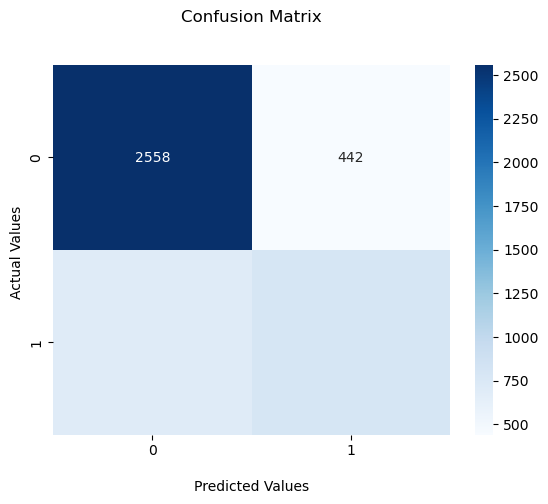

In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


In [192]:

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



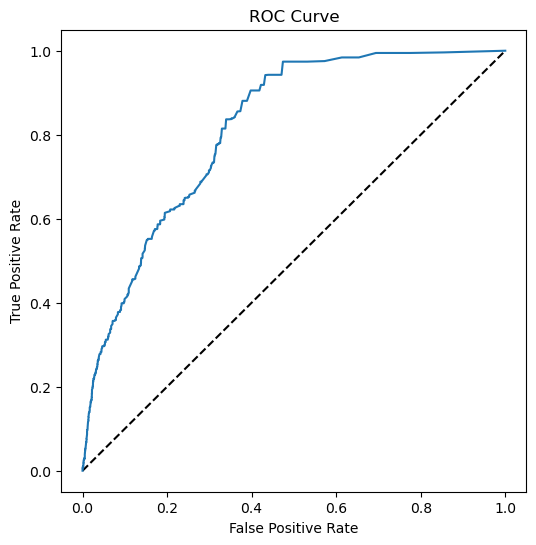

AUC: 0.8164931111111111


In [193]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

In [194]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



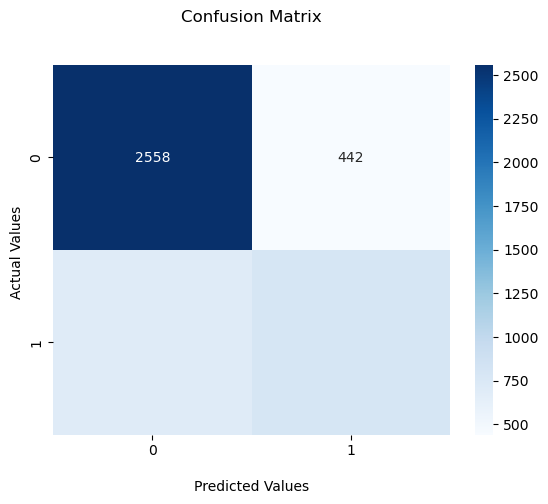

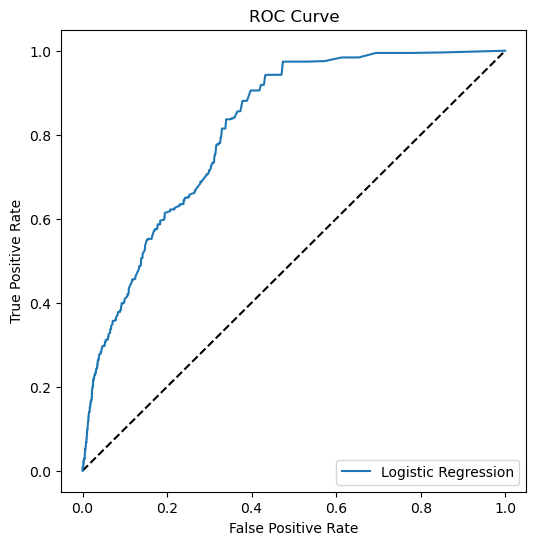

AttributeError: 'DataFrame' object has no attribute 'append'

In [195]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)


TASK 1, ZADANIE 1
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


In [198]:
#ZAAAD 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


from sklearn.metrics import f1_score


def regression_penalties(X_train_standardized, y_train, X_test_standardized, y_test):
    penalties = ['l2', None]
    reg_strengths = [0.01, 0.1, 1, 10]
    models = []
    prediction_sets_train = []
    prediction_sets = []
    f1s_train = []
    f1s_test = []

    #create models
    for penalty in penalties:
        for reg_strength in reg_strengths:
            model_lr = LogisticRegression(penalty=penalty, C=reg_strength)
            models.append(model_lr)

    #train models
    for model in models:
        model.fit(X_train_standardized, y_train)
    
    #calculate predictions on the training set
    for model in models:
        prediction_set_train = model.predict(X_train_standardized)
        prediction_sets_train.append(prediction_set_train)

    #use models
    for model in models:
        prediction_set = model.predict(X_test_standardized)
        prediction_sets.append(prediction_set)

    #calculate TRAIN f1s
    for prediction_set_test in prediction_sets_train:
        f1_train = f1_score(y_train, prediction_set_test)
        f1s_train.append(f1_train)

    #calculate TEST f1s
    for prediction_set in prediction_sets:
        f1_test = f1_score(y_test, prediction_set)
        f1s_test.append(f1_test)
    
    #print all results
    for model, f1_train, f1_test in zip(models, f1s_train, f1s_test):
        print(f'MODEL {model.penalty}:{model.C}:: f1_train={f1_train}, f1_test={f1_test}')
        plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)


c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters


MODEL l2:0.01:: f1_train=0.5367549668874172, f1_test=0.5674972108590555


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


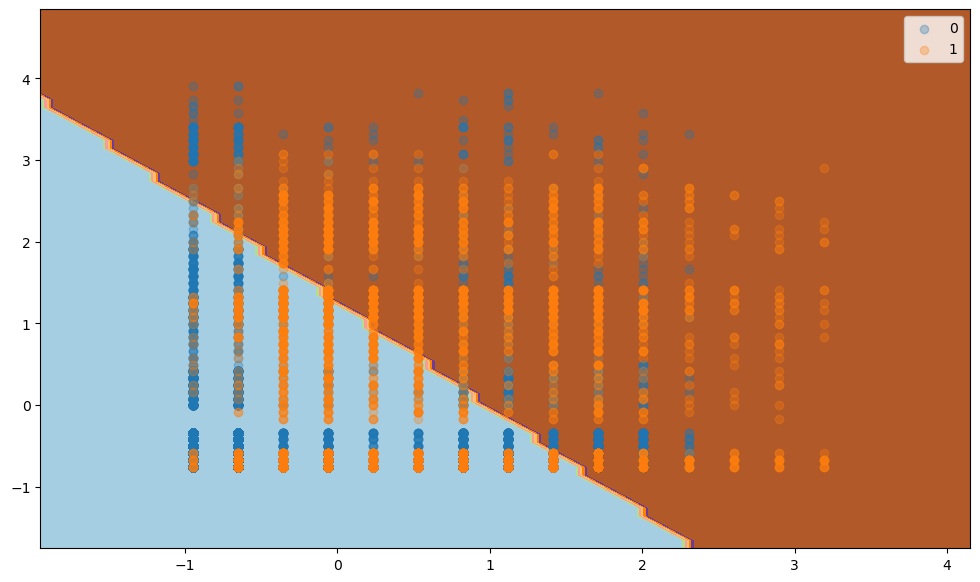

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


MODEL l2:0.1:: f1_train=0.5464035230794324, f1_test=0.5772893772893773


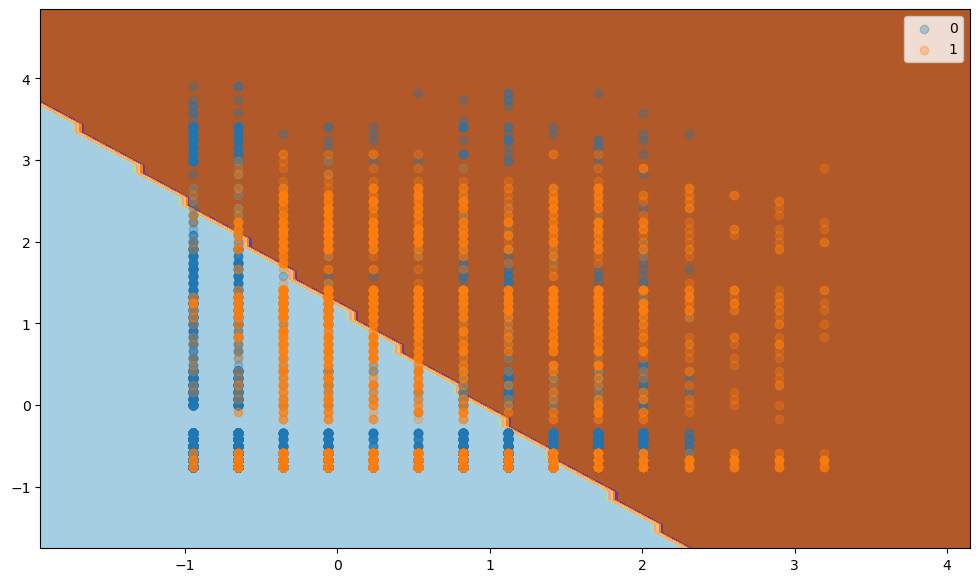

MODEL l2:1:: f1_train=0.5468775476928094, f1_test=0.5809280233832663


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


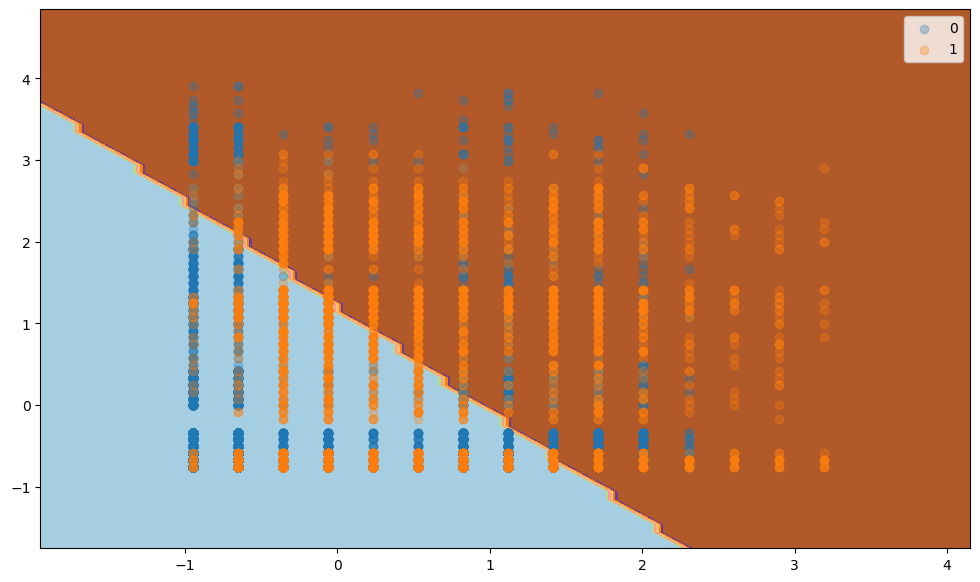

MODEL l2:10:: f1_train=0.5468775476928094, f1_test=0.5809280233832663


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


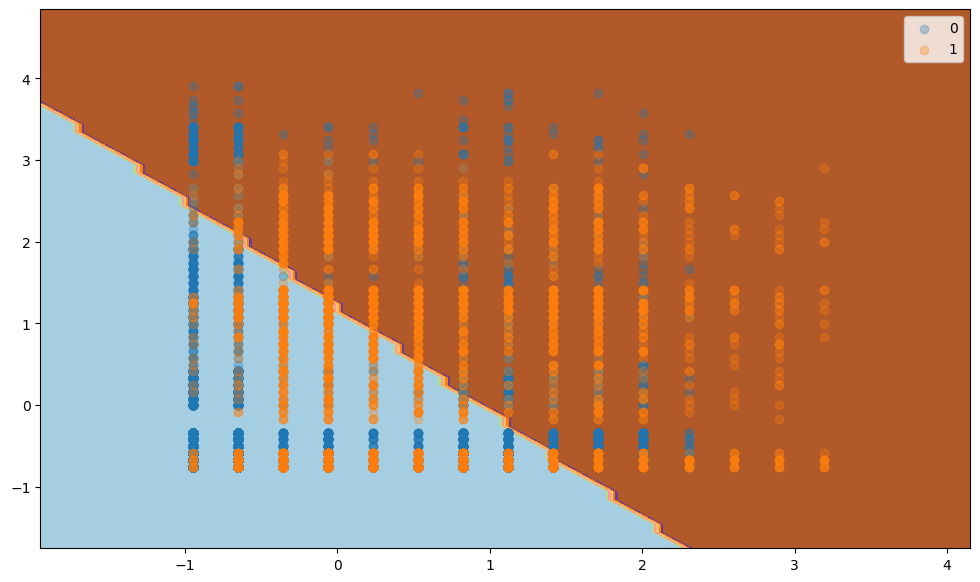

MODEL None:0.01:: f1_train=0.5468775476928094, f1_test=0.5809280233832663


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


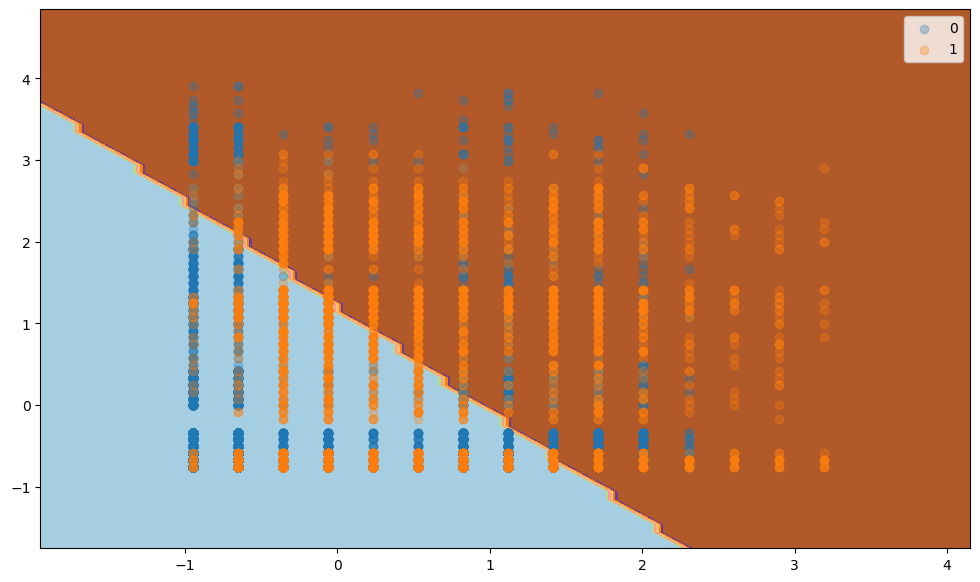

MODEL None:0.1:: f1_train=0.5468775476928094, f1_test=0.5809280233832663


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


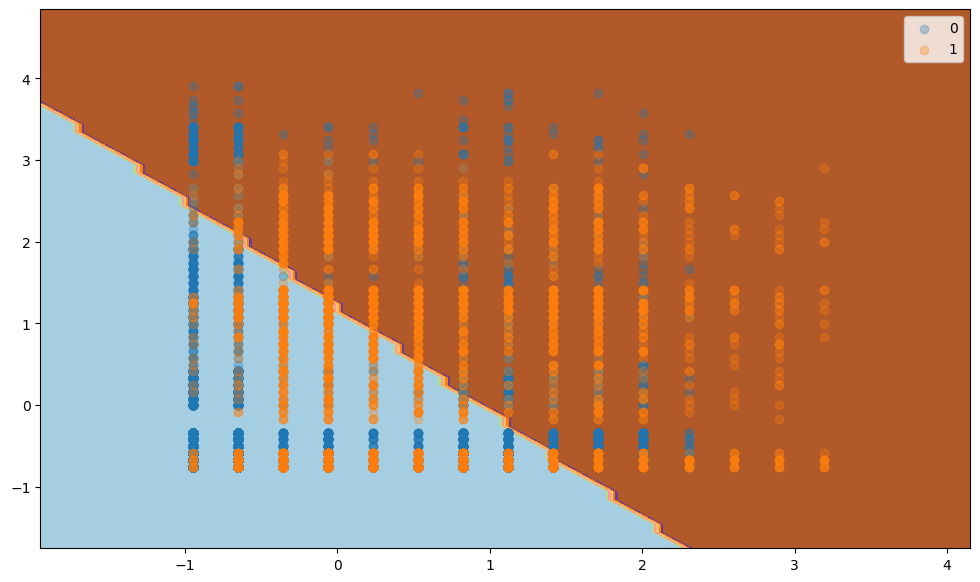

MODEL None:1:: f1_train=0.5468775476928094, f1_test=0.5809280233832663


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


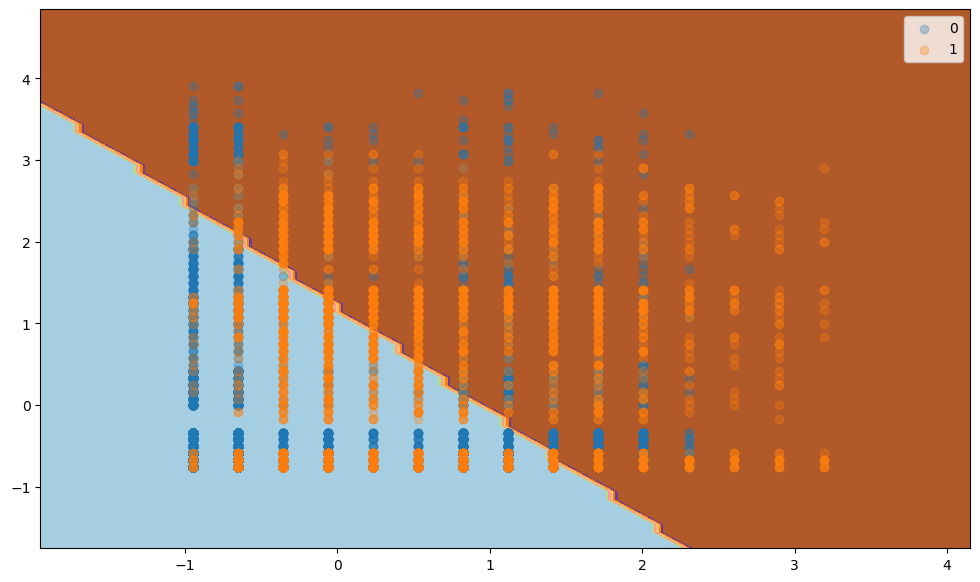

MODEL None:10:: f1_train=0.5468775476928094, f1_test=0.5809280233832663


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


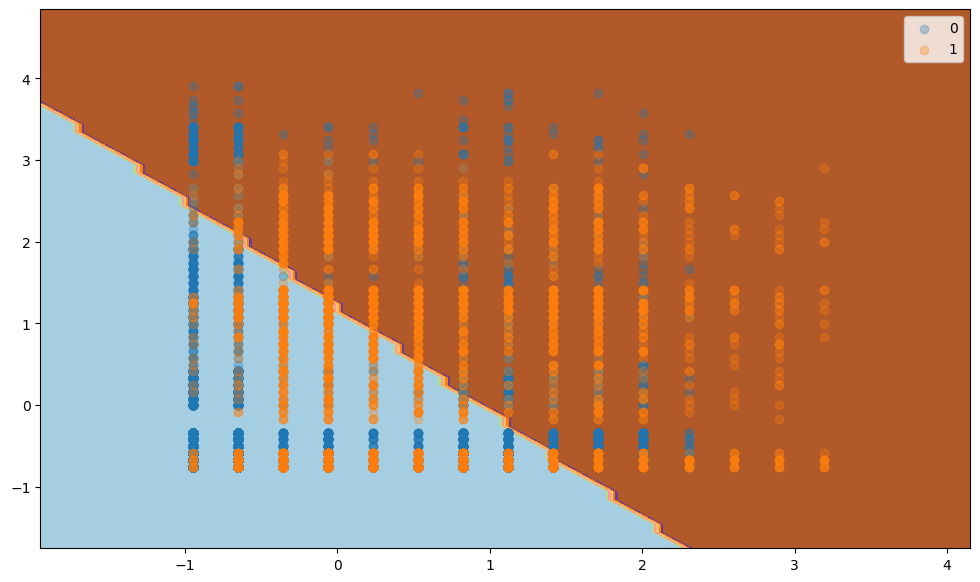

In [197]:
regression_penalties(X_train_standardized, y_train, X_test_standardized, y_test)

###TU POWIINY SIE WYSWIETLAC WYKRESY, ALE ICH NIE MA...

In [ ]:
print(X_train_standardized.shape)
print(y_train.shape)
print(X_test_standardized.shape)
print(y_test.shape)


(10500, 2)
(10500,)
(4500, 2)
(4500,)


KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN KNN 

C:\Users\krzys\AppData\Local\Temp\ipykernel_1228\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


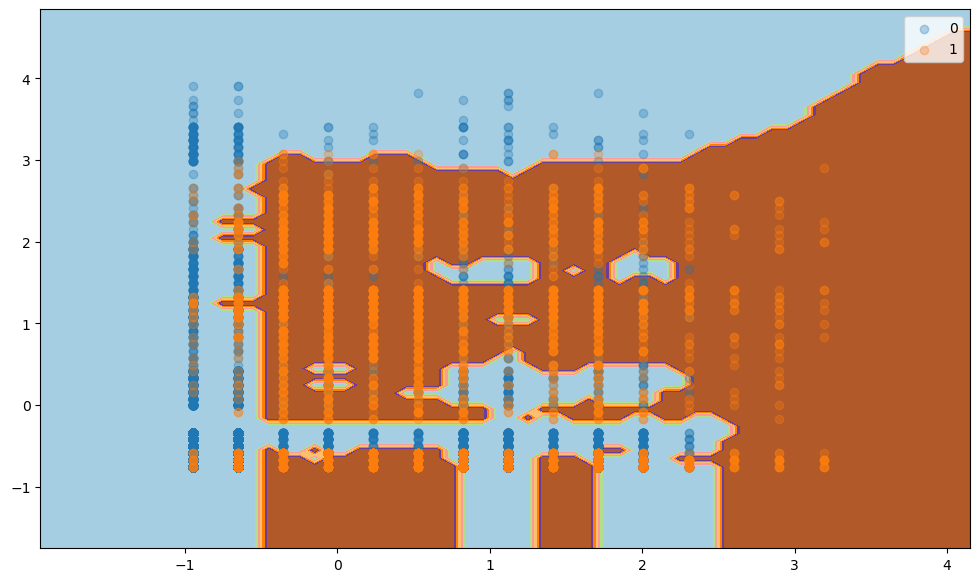

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.001))
model_knn.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_knn)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3000
           1       0.81      0.80      0.81      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.86      0.86      4500
weighted avg       0.87      0.87      0.87      4500



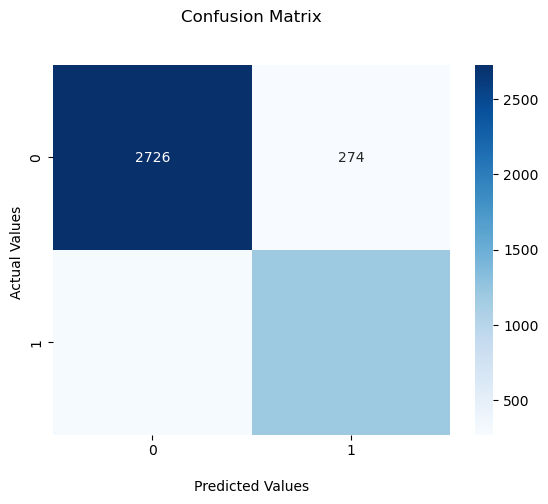

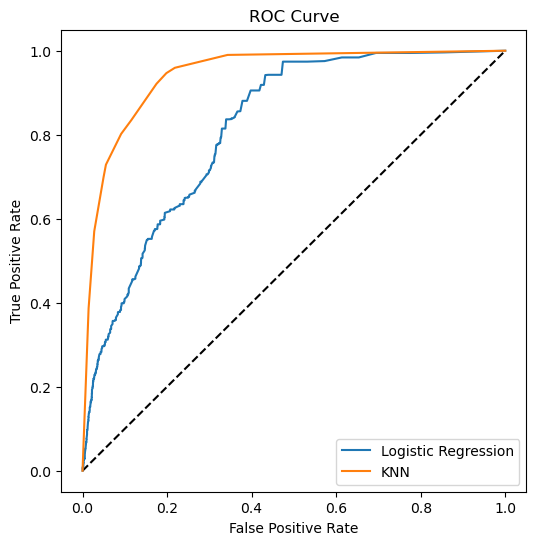

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


def task_2(X_train_standardized, y_train, X_test_standardized, y_test):
    weights = ['uniform', 'distance']
    k_s = [0.0001, 0.001, 0.01, 0.1]
    models = []
    prediction_sets_train = []
    prediction_sets = []
    f1s_train = []
    f1s_test = []

    #crearte models
    for weight in weights:
        for k in k_s:
            model_knn = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*k), weights=weight)
            models.append(model_knn)

    #train models
    for model in models:
        model.fit(X_train_standardized, y_train)
    
    #calculate predictions on the training set
    for model in models:
        prediction_set_train = model.predict(X_train_standardized)
        prediction_sets_train.append(prediction_set_train)

    #use models
    for model in models:
        prediction_set = model.predict(X_test_standardized)
        prediction_sets.append(prediction_set)

    #calculate TRAIN f1s
    for prediction_set_test in prediction_sets_train:
        f1_train = f1_score(y_train, prediction_set_test)
        f1s_train.append(f1_train)

    #calculate TEST f1s
    for prediction_set in prediction_sets:
        f1_test = f1_score(y_test, prediction_set)
        f1s_test.append(f1_test)
    
    #print all results
    for model, f1_train, f1_test in zip(models, f1s_train, f1s_test):
        print(f'MODEL {model.n_neighbors}:{model.weights}:: f1_train={f1_train}, f1_test={f1_test}')
        plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)


In [199]:
task_2(X_train_standardized, y_train, X_test_standardized, y_test)


NameError: name 'task_2' is not defined

In [ ]:
############################################################################################################################
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(X_train.shape[0]*0.001))
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [ ]:
import dtreeviz

import os
os.environ["PATH"] += os.pathsep + 'C:\Anaconda3\Library\bin\graphviz'

viz_model = dtreeviz.model(model_tree,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns,
                           target_name='Diabetic'
                           )


In [ ]:
X_train.info()
y_train.info()
X_train.columns

<class 'pandas.core.frame.DataFrame'>
Index: 10500 entries, 6050 to 10035
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             10500 non-null  int64  
 1   PlasmaGlucose           10500 non-null  int64  
 2   DiastolicBloodPressure  10500 non-null  int64  
 3   TricepsThickness        10500 non-null  int64  
 4   SerumInsulin            10500 non-null  int64  
 5   BMI                     10500 non-null  float64
 6   DiabetesPedigree        10500 non-null  float64
 7   Age                     10500 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 738.3 KB
<class 'pandas.core.series.Series'>
Index: 10500 entries, 6050 to 10035
Series name: Diabetic
Non-Null Count  Dtype
--------------  -----
10500 non-null  int64
dtypes: int64(1)
memory usage: 164.1 KB


Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')

c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


KeyError: 'axis'

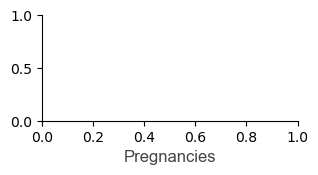

In [ ]:
###NIESZCZESNE DRZEWO DECYZYJNE TU

viz_model.view(scale=2)

#
#
#
#
#

In [202]:
display(viz_model)

c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


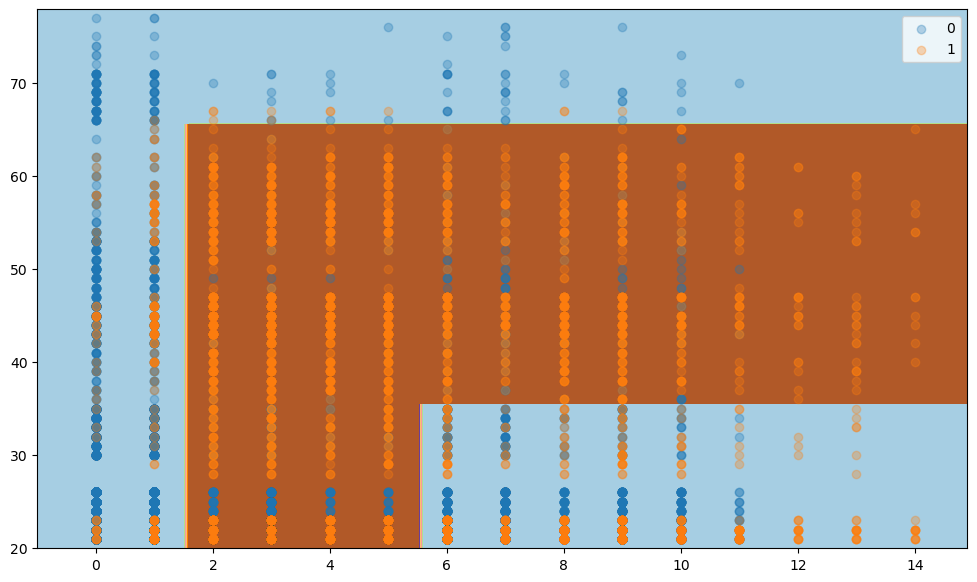

In [ ]:
import numpy as np

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_tree)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3000
           1       0.80      0.76      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500



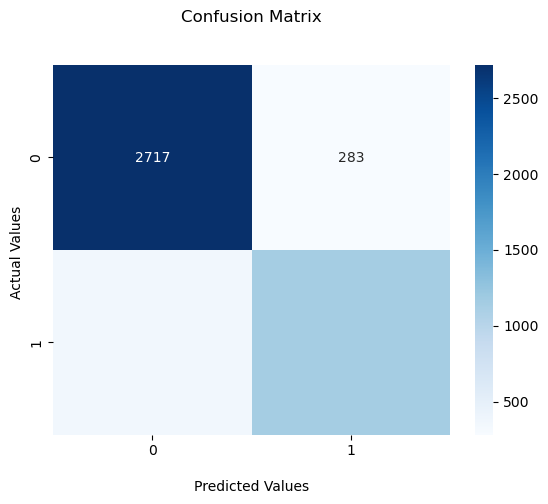

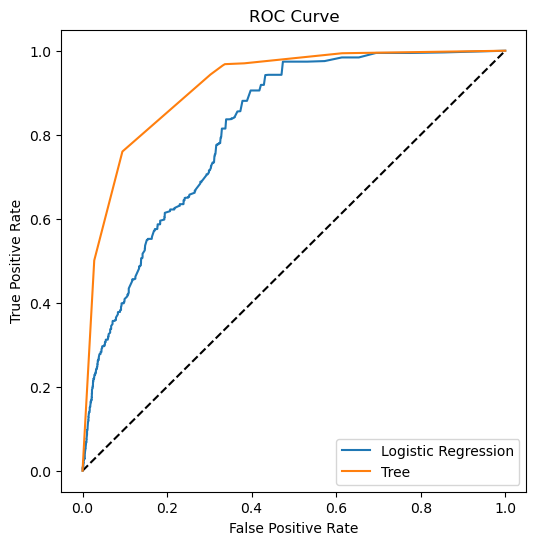

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(X_train.shape[0]*0.001))
model_tree.fit(X_train, y_train)

def task_3(X_train_standardized, y_train, X_test_standardized, y_test):
    depths = [3, 5, 10, 20]
    leafs = [0.0001, 0.001]
    models = []
    prediction_sets_train = []
    prediction_sets = []
    f1s_train = []
    f1s_test = []

    #crearte models
    for depth in depths:
        for leaf in leafs:
            model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(X_train.shape[0]*leaf))
            models.append(model)

    #train models
    for model in models:
        model.fit(X_train_standardized, y_train)
    
    #calculate predictions on the training set
    for model in models:
        prediction_set_train = model.predict(X_train_standardized)
        prediction_sets_train.append(prediction_set_train)

    #use models
    for model in models:
        prediction_set = model.predict(X_test_standardized)
        prediction_sets.append(prediction_set)

    #calculate TRAIN f1s
    for prediction_set_test in prediction_sets_train:
        f1_train = f1_score(y_train, prediction_set_test)
        f1s_train.append(f1_train)

    #calculate TEST f1s
    for prediction_set in prediction_sets:
        f1_test = f1_score(y_test, prediction_set)
        f1s_test.append(f1_test)
    
    #print all results
    for model, f1_train, f1_test in zip(models, f1s_train, f1s_test):
        print(f'MODEL {model.max_depth}:{model.min_samples_leaf}:: f1_train={f1_train}, f1_test={f1_test}')
        plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)


MODEL 3:1:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


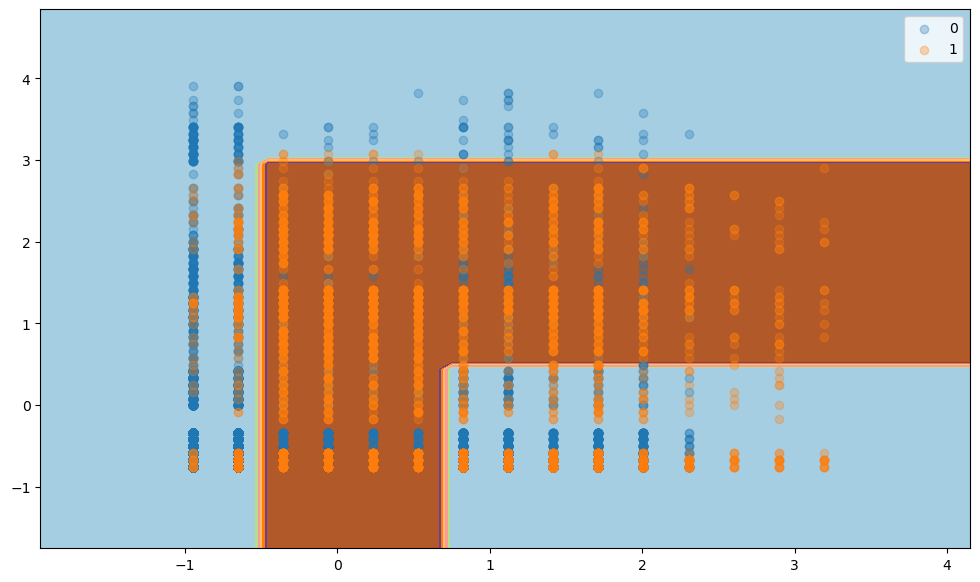

MODEL 3:10:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


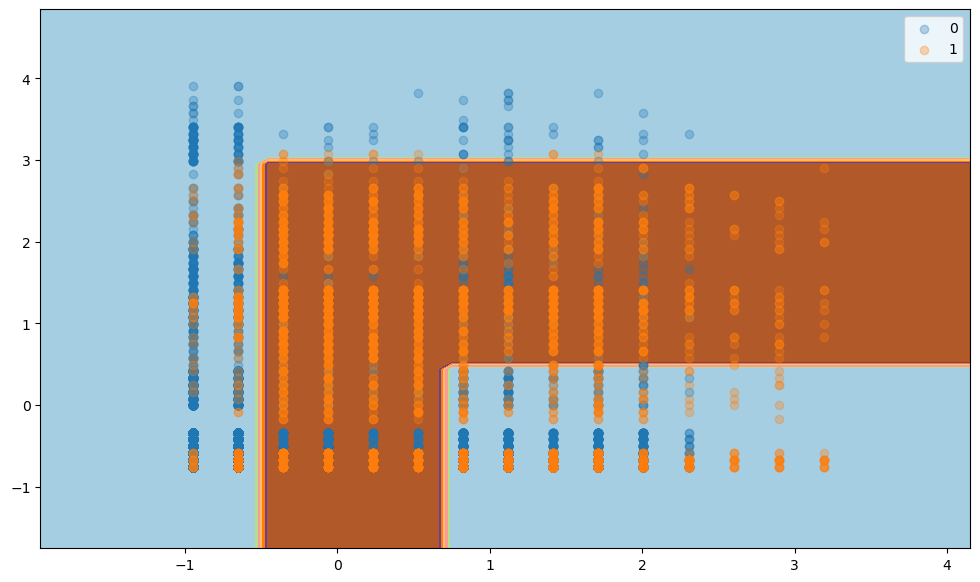

MODEL 3:1:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


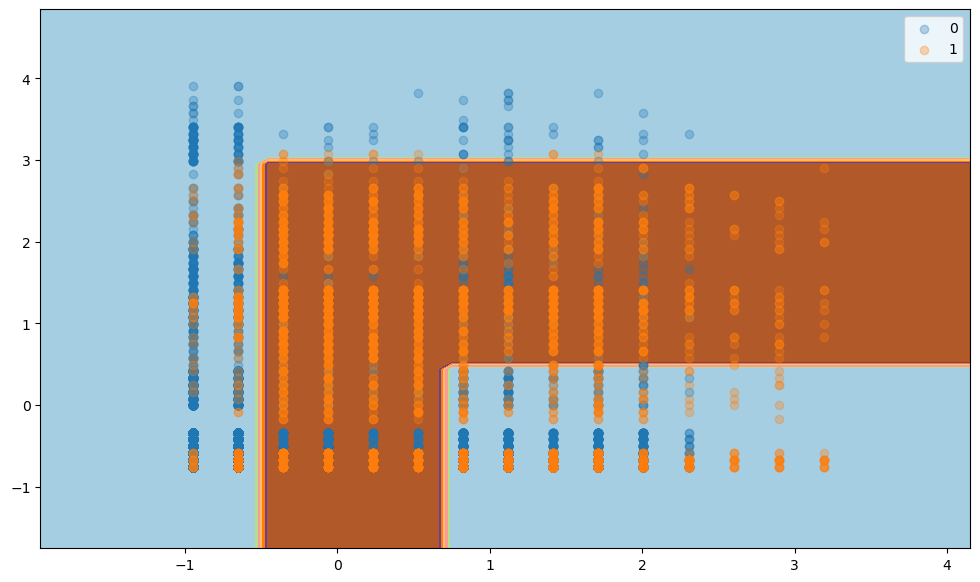

MODEL 3:10:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


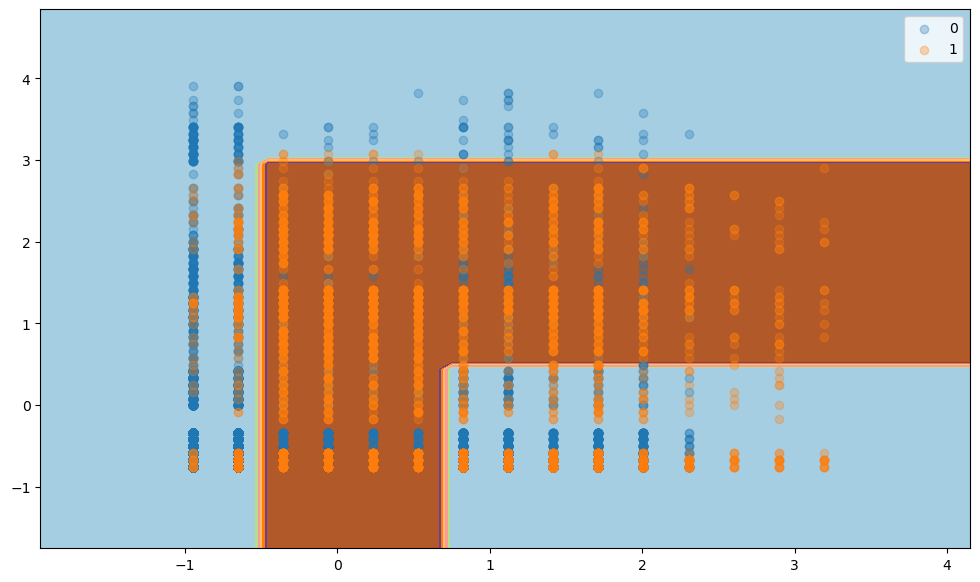

MODEL 3:1:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


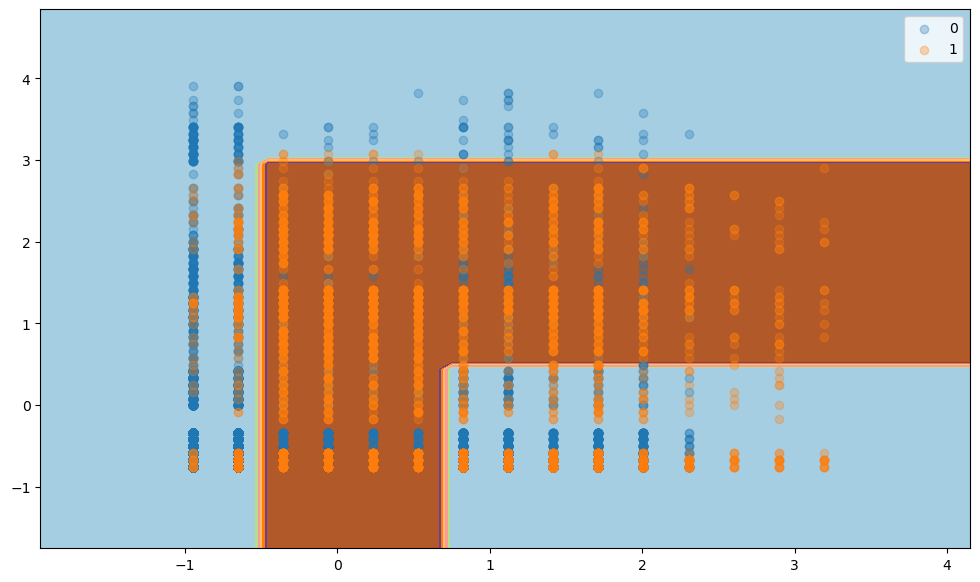

MODEL 3:10:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


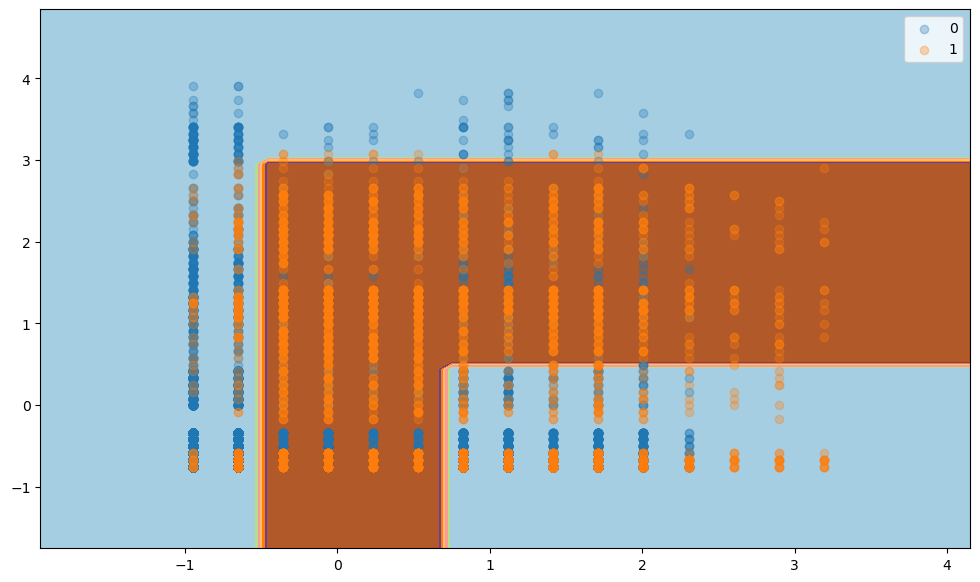

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


MODEL 3:1:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


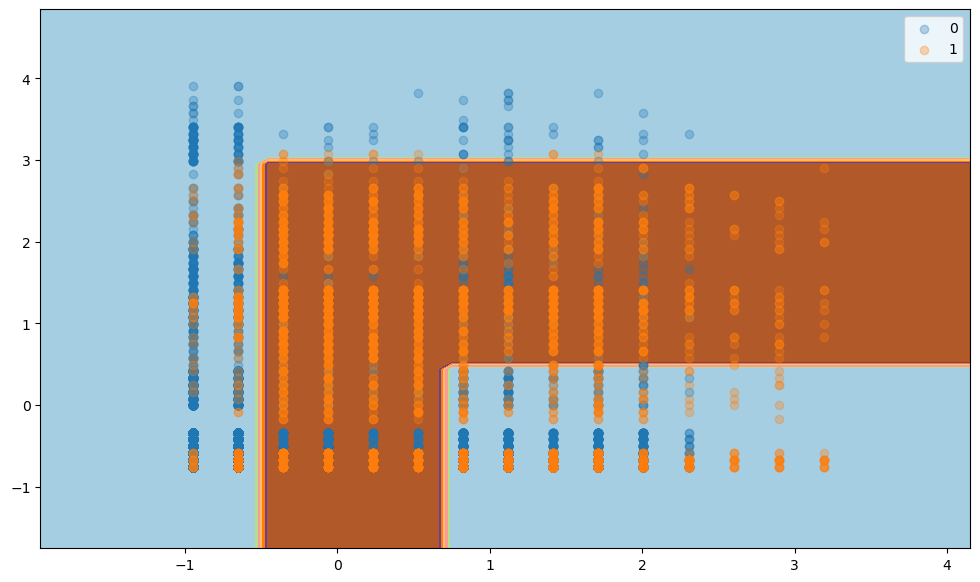

C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


MODEL 3:10:: f1_train=0.7779925650557621, f1_test=0.7800205268559699


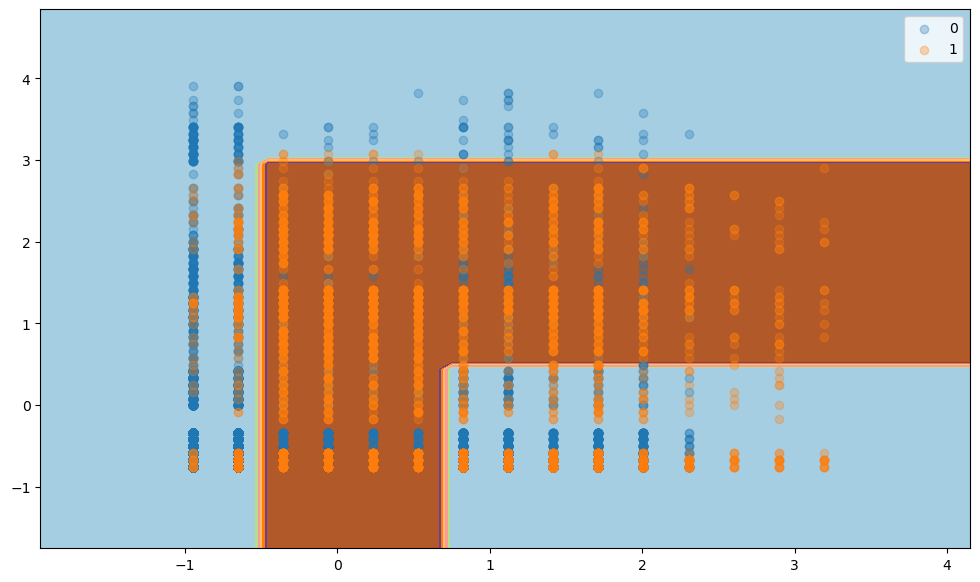

In [ ]:
task_3(X_train_standardized, y_train, X_test_standardized, y_test)


C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


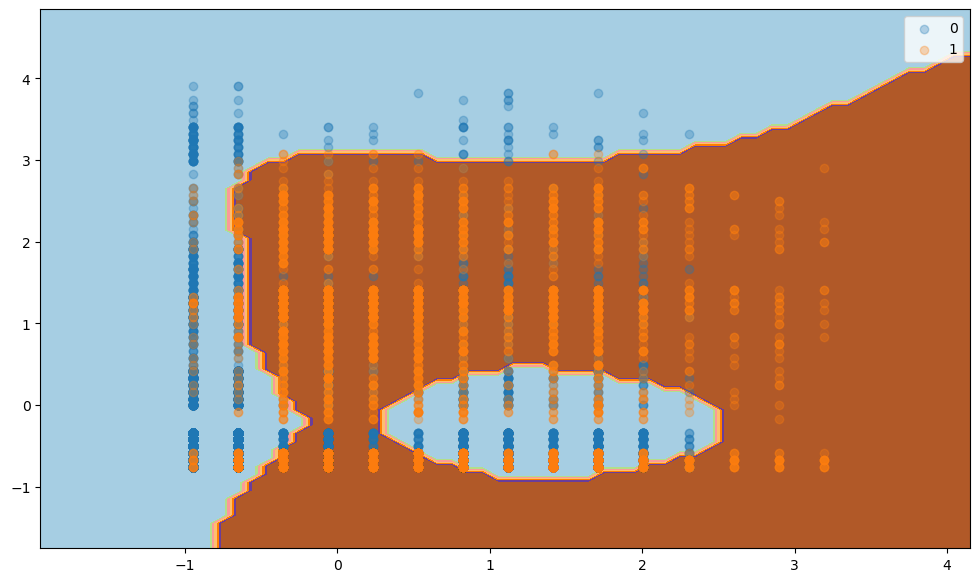

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_svm)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3000
           1       0.80      0.76      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500



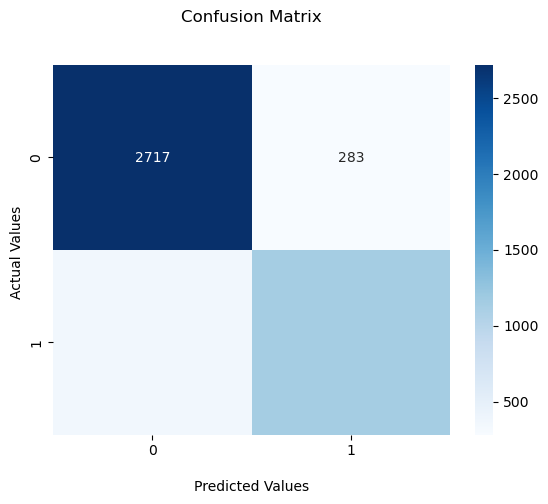

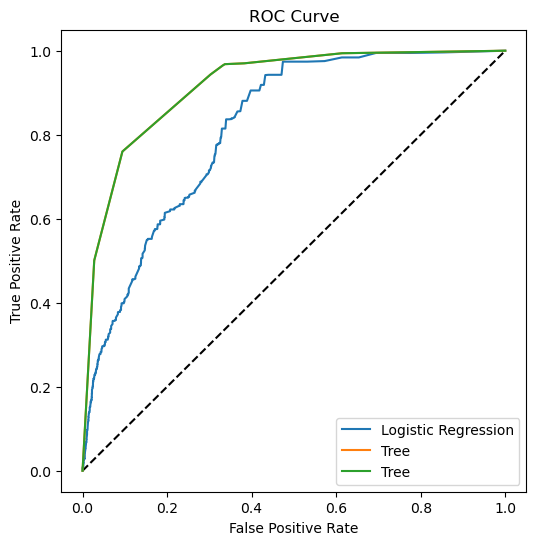

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)


c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


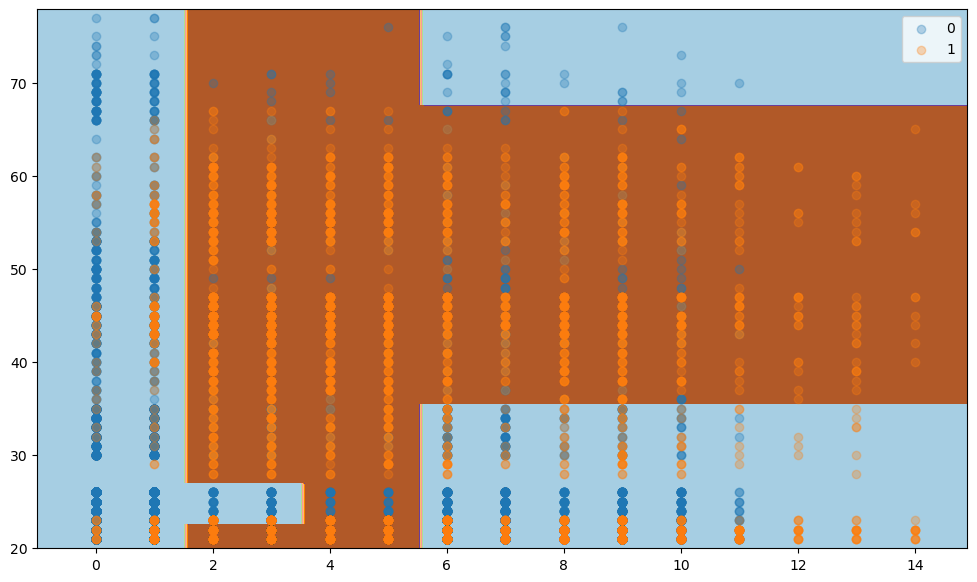

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=int(X_train.shape[0]*0.001))
model_forest.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_forest)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3000
           1       0.84      0.74      0.79      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.83      0.84      4500
weighted avg       0.86      0.87      0.86      4500



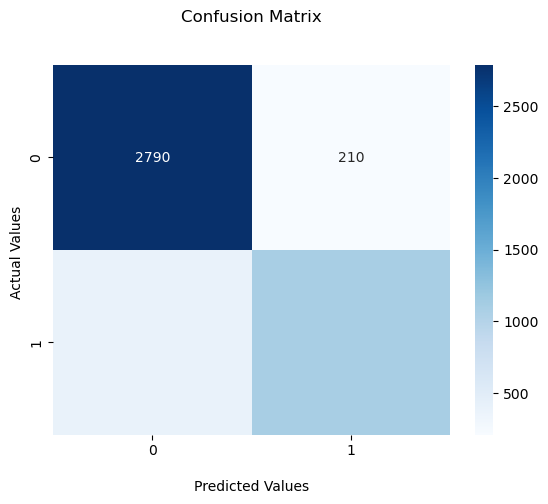

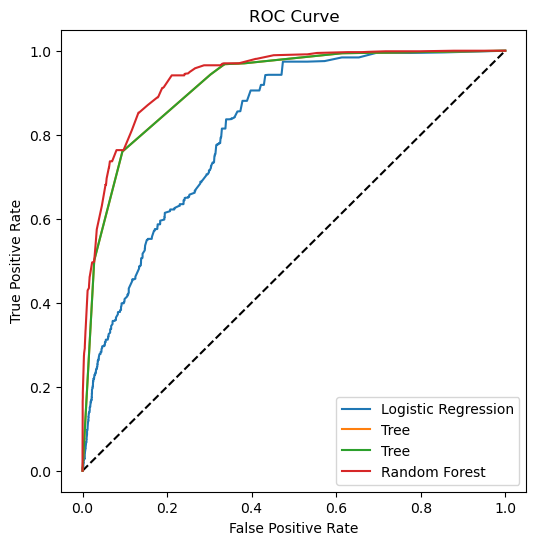

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
calculate_metrics(model_forest, 'Random Forest', X_test, y_test)


c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


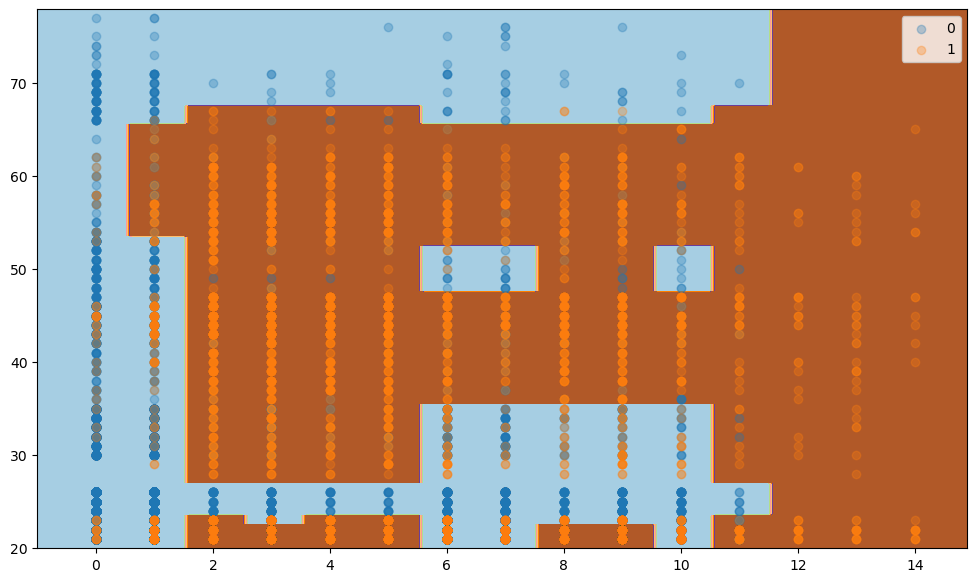

In [200]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_adaboost)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.84      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.89      0.88      0.88      4500



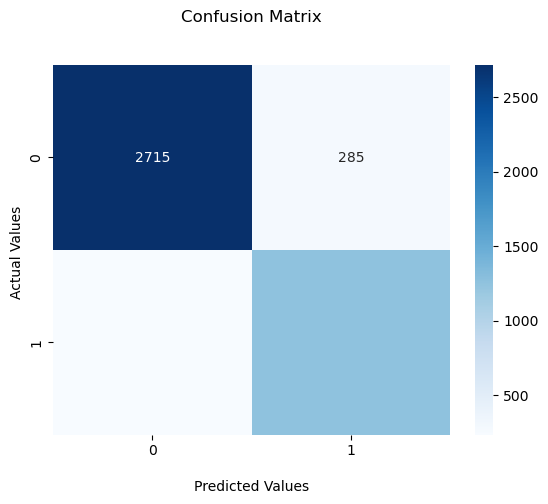

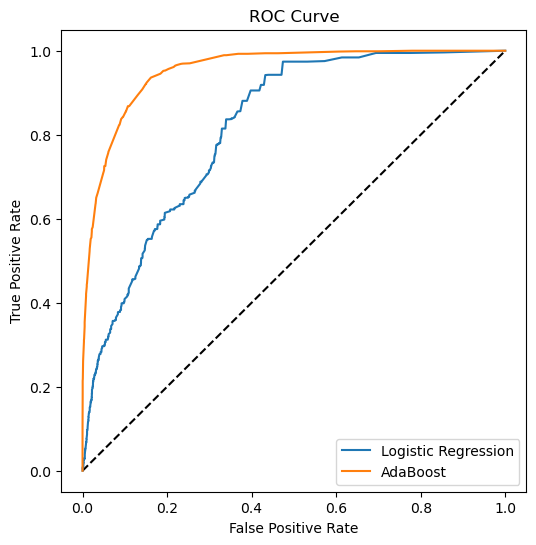

AttributeError: 'DataFrame' object has no attribute 'append'

In [201]:
calculate_metrics(model_adaboost, 'AdaBoost', X_test, y_test)


c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
c:\Users\krzys\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
C:\Users\krzys\AppData\Local\Temp\ipykernel_9348\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


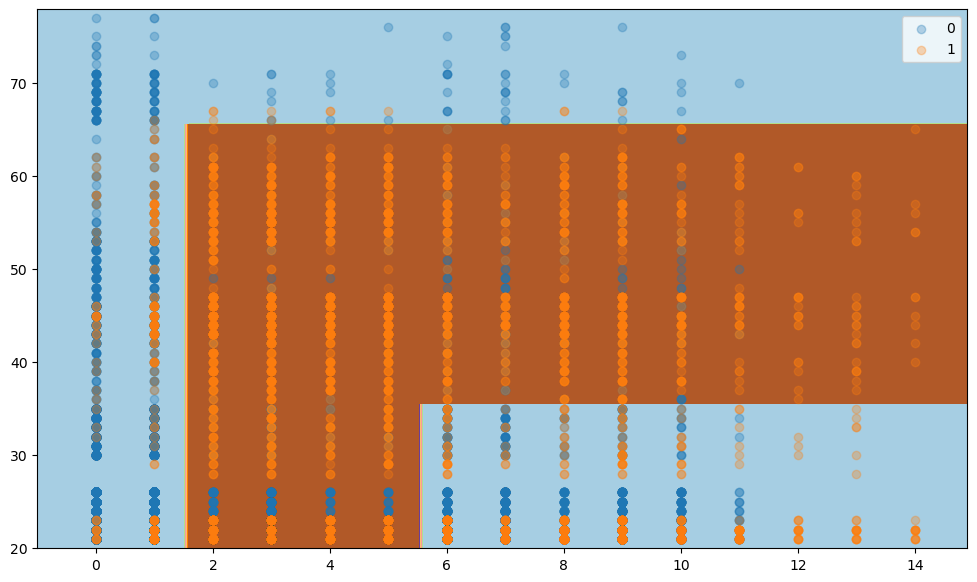

In [ ]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3000
           1       0.80      0.76      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500



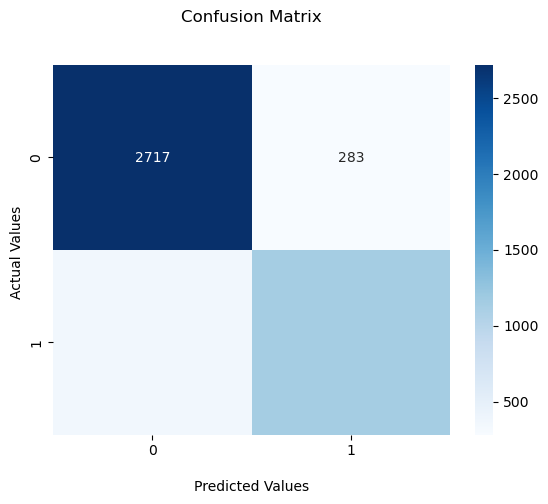

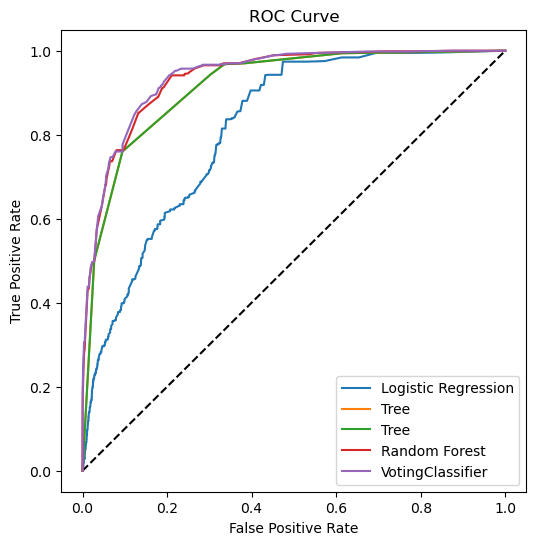

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)


In [ ]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3000
           1       0.92      0.90      0.91      1500

    accuracy                           0.94      4500
   macro avg       0.94      0.93      0.93      4500
weighted avg       0.94      0.94      0.94      4500



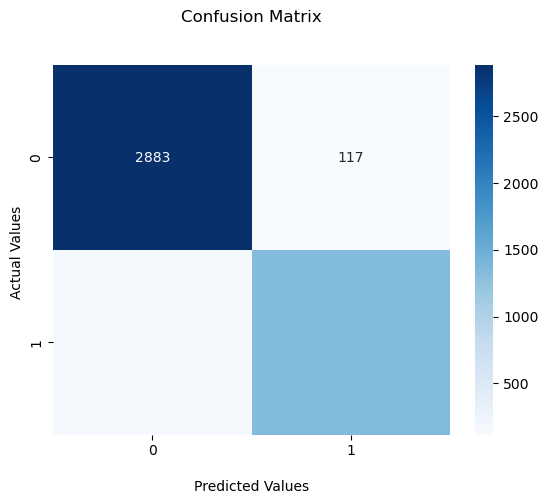

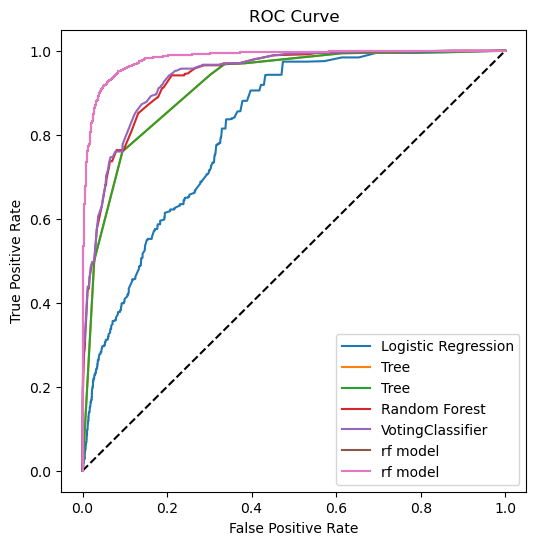

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
calculate_metrics(rf_model_v2, 'rf model', X_test, y_test)


In [ ]:
# random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
# params_rf = {'max_depth': [3, 5, 10, 20],
#              'min_samples_leaf': [3, 5, 10, 15]}


# def gridsearch(models, params_set, X_test, y_test):
#     for model, params in zip(models, params_set):
#         rf_gridsearch = GridSearchCV(model,
#                                     params,
#                                     scoring='f1_macro',
#                                     cv=5,
#                                     verbose=10, n_jobs=-1)
#         rf_gridsearch.fit(X_train, y_train)
#         print('\nBest hyperparameter:', rf_gridsearch.best_params_)
#         rf_model_v2 = rf_gridsearch.best_estimator_

#         calculate_metrics(model, model.name, X_test, y_test)

